# Gapminder Visuals 

In this notebook, we will use ggplot2 and plotly functions to do a little EDA. 

Let's read the Gapminder data from the web resource.

In [6]:
library(ggplot2)
library(plotly)
library(RColorBrewer)

data <- read.csv("https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv")
head(data)

country     year pop      continent lifeExp gdpPercap
1 Afghanistan 1952  8425333 Asia      28.801  779.4453 
2 Afghanistan 1957  9240934 Asia      30.332  820.8530 
3 Afghanistan 1962 10267083 Asia      31.997  853.1007 
4 Afghanistan 1967 11537966 Asia      34.020  836.1971 
5 Afghanistan 1972 13079460 Asia      36.088  739.9811 
6 Afghanistan 1977 14880372 Asia      38.438  786.1134

Subset of the data between years 1951 and 1993. 

In [7]:
data_sub <- data[which(data$year > 1951 & data$year < 1993), ]
head(data_sub)
summary(data_sub)

country     year pop      continent lifeExp gdpPercap
1 Afghanistan 1952  8425333 Asia      28.801  779.4453 
2 Afghanistan 1957  9240934 Asia      30.332  820.8530 
3 Afghanistan 1962 10267083 Asia      31.997  853.1007 
4 Afghanistan 1967 11537966 Asia      34.020  836.1971 
5 Afghanistan 1972 13079460 Asia      36.088  739.9811 
6 Afghanistan 1977 14880372 Asia      38.438  786.1134

        country          year           pop               continent  
 Afghanistan:   9   Min.   :1952   Min.   :6.001e+04   Africa  :468  
 Albania    :   9   1st Qu.:1962   1st Qu.:2.413e+06   Americas:225  
 Algeria    :   9   Median :1972   Median :6.067e+06   Asia    :297  
 Angola     :   9   Mean   :1972   Mean   :2.566e+07   Europe  :270  
 Argentina  :   9   3rd Qu.:1982   3rd Qu.:1.611e+07   Oceania : 18  
 Australia  :   9   Max.   :1992   Max.   :1.165e+09                 
 (Other)    :1224                                                    
    lifeExp        gdpPercap       
 Min.   :23.60   Min.   :   298.9  
 1st Qu.:46.39   1st Qu.:  1135.8  
 Median :58.04   Median :  3081.9  
 Mean   :57.33   Mean   :  6210.6  
 3rd Qu.:69.17   3rd Qu.:  7993.1  
 Max.   :79.36   Max.   :113523.1  
                                   

Let's plot small multiples of histograms of life expectancy for each year for the subset. I'll use a binwidth of 5, and use sensible axis labels.

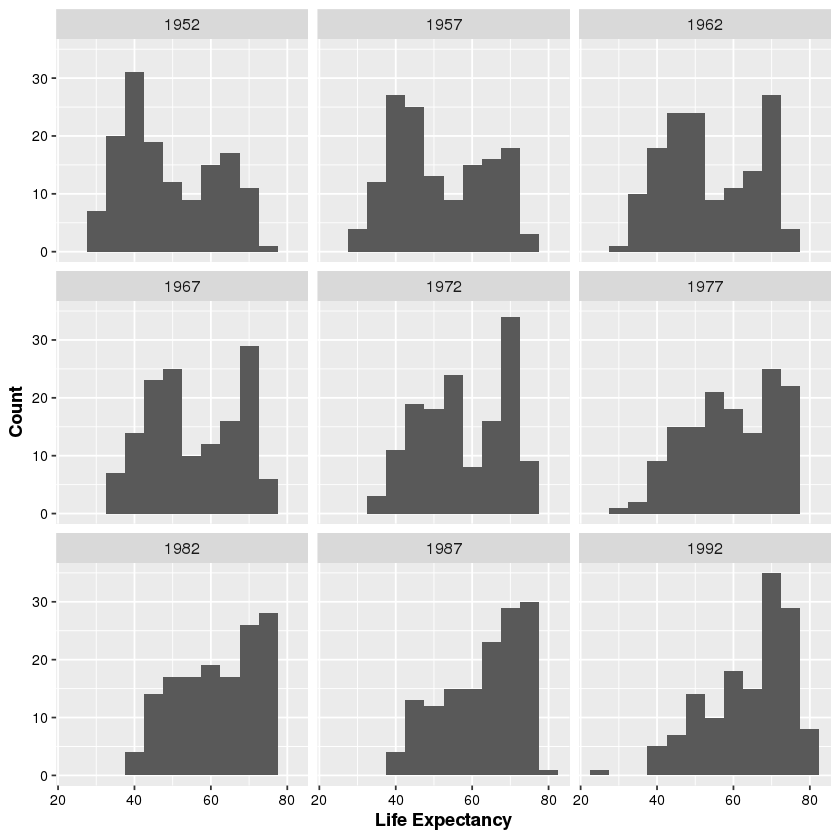

In [8]:
ggplot(data_sub, aes(x = lifeExp)) + 
    geom_histogram(binwidth = 5) + 
    facet_wrap(~ year) +
    xlab("Life Expectancy") +
    ylab("Count") +
    theme(strip.text=element_text(size=10), axis.title.y=element_text(face="bold"), axis.title.x=element_text(face="bold"), axis.text=(element_text(color="black")))

Now I'll do the same as above, but plot a density function this time. 

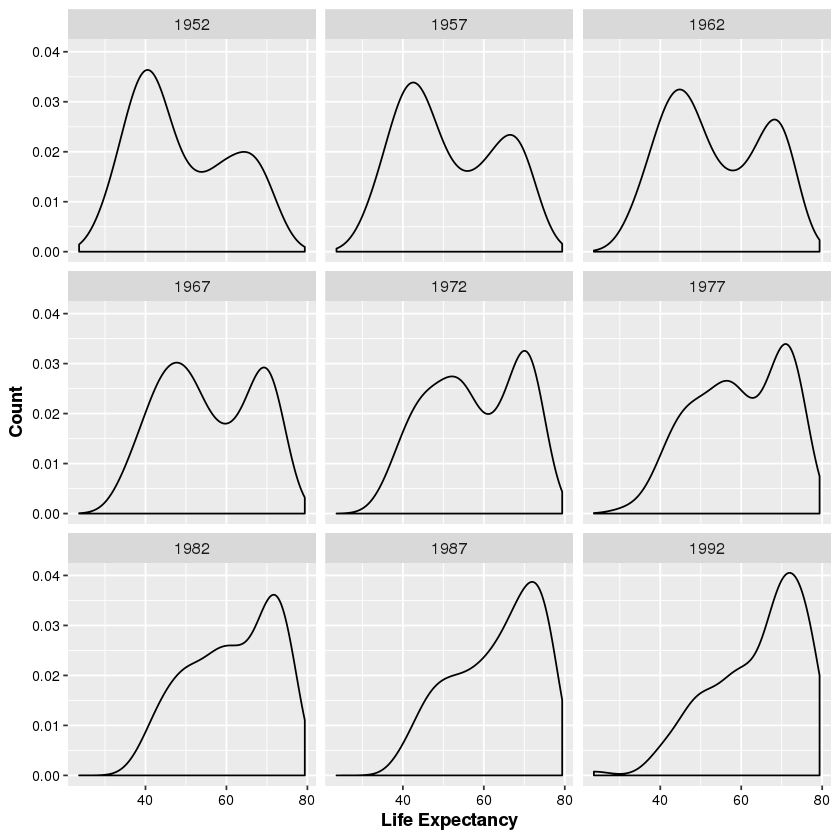

In [9]:
ggplot(data_sub, aes(x = lifeExp)) + 
    geom_density() + 
    facet_wrap(~ year) +
    xlab("Life Expectancy") +
    ylab("Count") +
    theme(strip.text=element_text(size=10), axis.title.y=element_text(face="bold"), axis.title.x=element_text(face="bold"), axis.text=(element_text(color="black")))

Now I'll create a line plot to show the year versus population for the **whole** data set. 

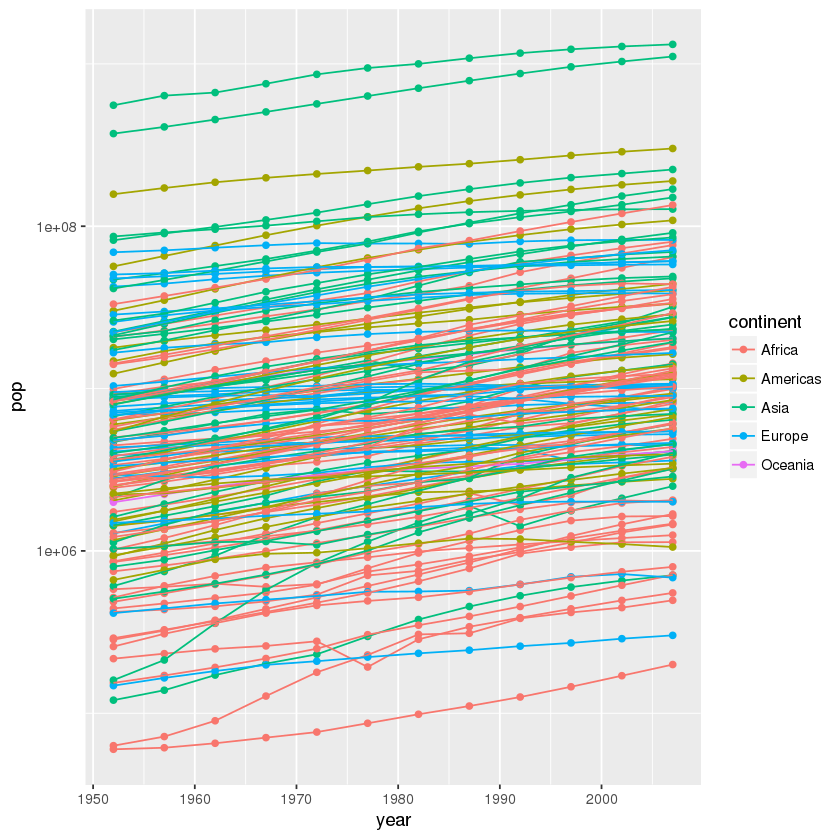

In [14]:
ggplot(data, aes(x = year, y = pop, group = country, color = continent)) + 
    geom_point() + 
    geom_line() + 
    scale_y_log10()

The above plot is too crowded to see anything. Let's aggregate data by continent and year so that we can have meaningful data to plot. The following code creates a new data frame by computing the sums of population for years and continents.

In [11]:
aggdata <- aggregate(data$pop, by=list(continent=data$continent, year=data$year), FUN=sum, na.rm=TRUE)

head(aggdata)

continent year x         
1 Africa    1952  237640501
2 Americas  1952  345152446
3 Asia      1952 1395357352
4 Europe    1952  418120846
5 Oceania   1952   10686006
6 Africa    1957  264837738

Now I will repeat the visual above with this aggregate data and group and color by continent. 

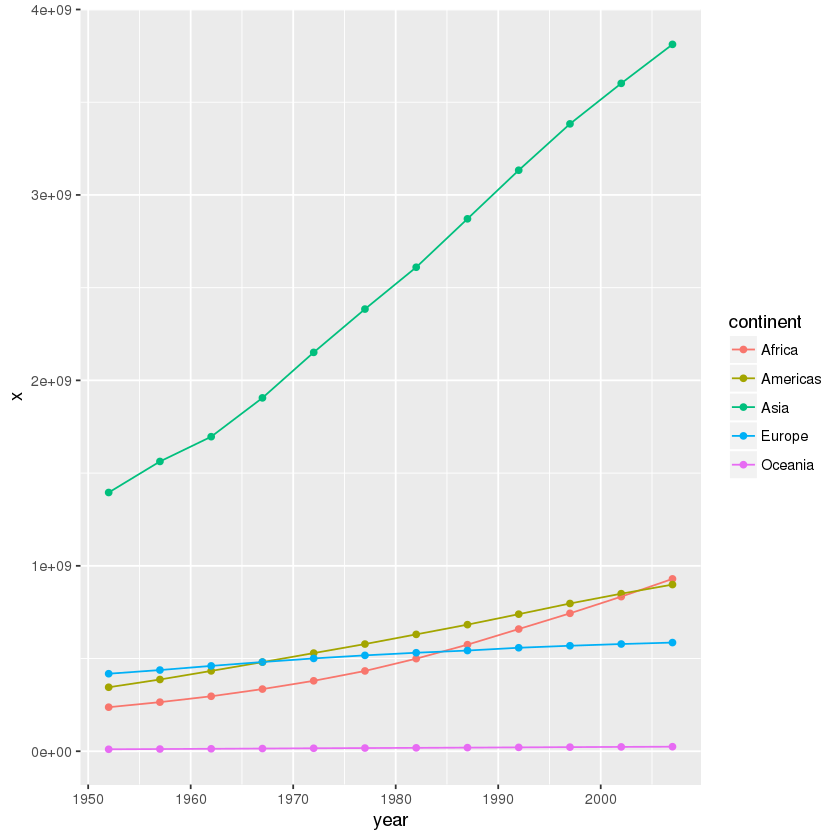

In [12]:
ggplot(aggdata, aes(x = year, y = x, group = continent, color = continent)) + 
    geom_point() +
    geom_line()

Now I'll plot a stacked area chart to see the same. Instead of group and color, use only fill parameter for continent, and use geom_area.

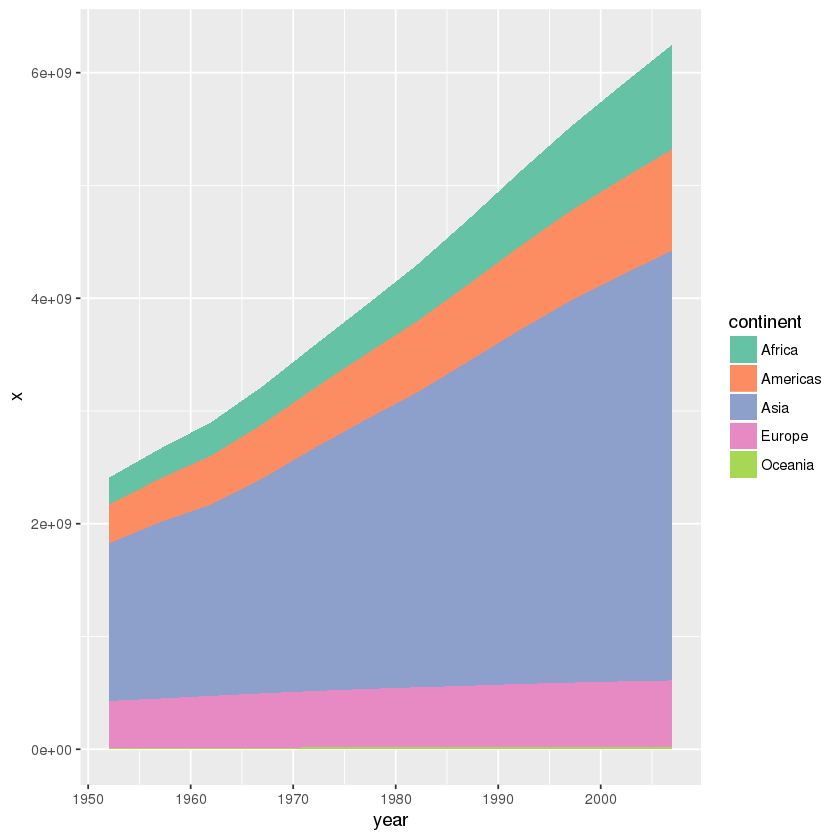

In [15]:
ggplot(aggdata, aes(x = year, y = x, fill = continent)) + 
    geom_area() +
    scale_fill_brewer(palette="Set2") 

The above plot shows actual population numbers and they grow in time. We want to see the percentage change of the continents' populations w.r.t total world population. The code below computes that. 

In [16]:
my_fun=function(vec){ as.numeric(vec[3]) / sum(aggdata$x[aggdata$year==vec[2]]) *100 }
aggdata$perc=apply(aggdata , 1 , my_fun)

head(aggdata)

continent year x          perc      
1 Africa    1952  237640501  9.8730674
2 Americas  1952  345152446 14.3397836
3 Asia      1952 1395357352 57.9718401
4 Europe    1952  418120846 17.3713456
5 Oceania   1952   10686006  0.4439633
6 Africa    1957  264837738  9.9398470

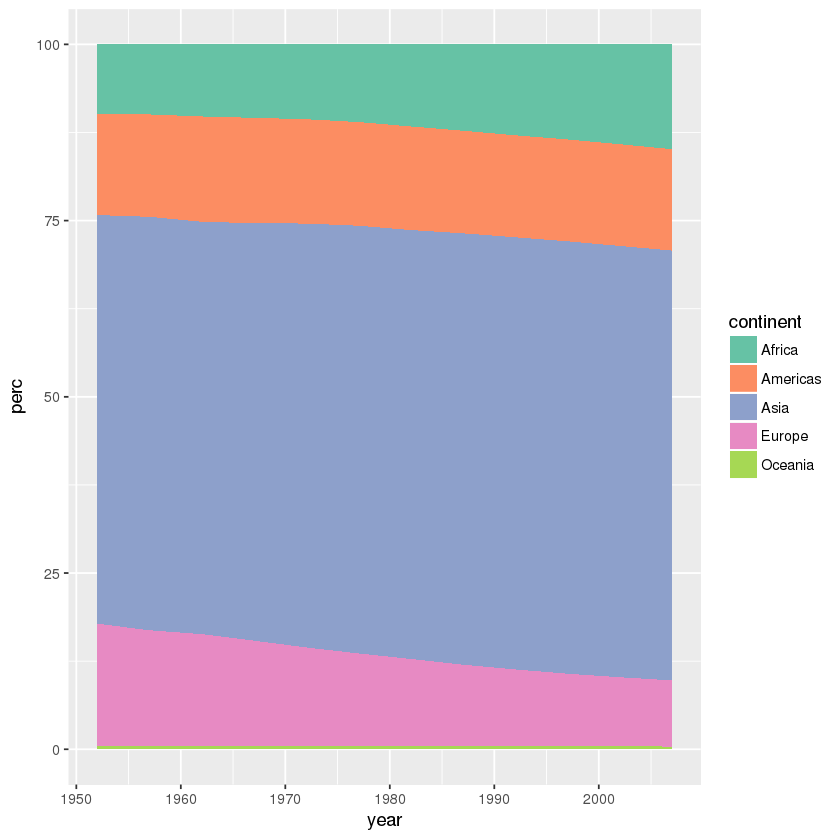

In [17]:
ggplot(aggdata, aes(x = year, y = perc, fill = continent)) + 
    geom_area() +
    scale_fill_brewer(palette="Set2")

We will aggregate once more; this time we will compute the *mean* gdp per capita for continents and years. 

In [31]:
aggdata2 <- aggregate(data$gdp, by=list(continent = data$continent, year = data$year), FUN=mean, na.rm=TRUE)
head(aggdata2)
newdata <- aggdata2
newdata$mean_gdp <- aggdata2$x
str(newdata)

continent year x        
1 Africa    1952  1252.572
2 Americas  1952  4079.063
3 Asia      1952  5195.484
4 Europe    1952  5661.057
5 Oceania   1952 10298.086
6 Africa    1957  1385.236

'data.frame':	60 obs. of  4 variables:
 $ continent: Factor w/ 5 levels "Africa","Americas",..: 1 2 3 4 5 1 2 3 4 5 ...
 $ year     : int  1952 1952 1952 1952 1952 1957 1957 1957 1957 1957 ...
 $ x        : num  1253 4079 5195 5661 10298 ...
 $ mean_gdp : num  1253 4079 5195 5661 10298 ...


Now I'll plot a heatmap using **plot_ly function** for years vs. continents using the mean gdp per capita as the z value. 

HTML widgets cannot be represented in plain text (need html)

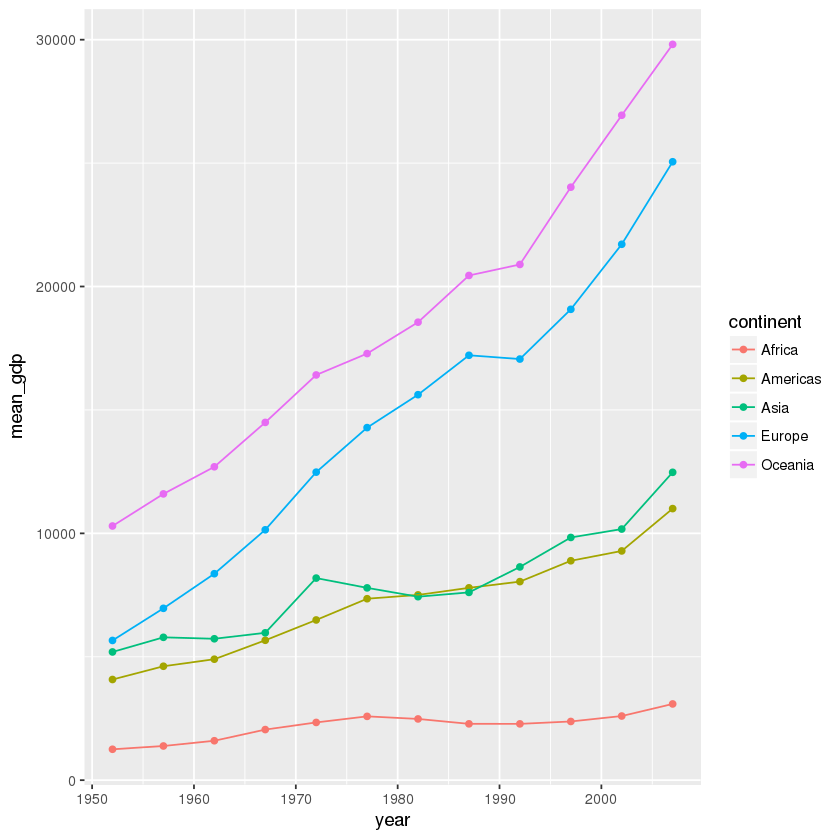

In [50]:
plot_ly(newdata, x = ~year, y = ~continent, z = ~mean_gdp, type = "heatmap", colors = colorRamp(c("white", "blue")))

# We can plot this a little differently too
g <- ggplot(newdata, aes(x = year, y = mean_gdp, group = continent, color = continent)) + geom_point() + geom_line()
g 

Now I will plot a boxplot gdp per capita using **plot_ly function** for continents. Use the **whole** data set, color by continent and color by scale.  

In [54]:
p3 <- plot_ly(data, y = ~gdpPercap, color = ~continent, type = "box") %>% layout(yaxis = list(type = "log"))
p3

HTML widgets cannot be represented in plain text (need html)

The box plot above shows that some continents have a wider gap between the wealthiest people (measured in gdp per capita) than poor people.  It appears that the Americas have the least inquity between rich and poor, followed by Europe.  Asia appears to have the greatest gap between the rich and the poor. 